In [1]:
import sys, os
import numpy             as np
import scipy             as sp
import scipy.optimize    as opt
import matplotlib.pyplot as plt
from   matplotlib import rc, patches

path_PythonCodeSet = "/Users/miiya/python_code-set"
sys.path.append(path_PythonCodeSet)
sys.path.append(path_PythonCodeSet+"/zzz.main_sub/indep_code/plot")

import plot_Zfactor

In [ ]:
ibase = "/Users/miiya/data/results.sloppy.t_mod12_0_5.x_mod10_0_5.y_mod10_0_5.z_mod10_0_5.ave.S0.S4"
ihad  = "proton_CG05_CG05"

Corr_PS, Corr_SS = plot_Zfactor.main_read(ibase, ihad, 1, 9)

In [ ]:
lat_spacing = None
fit_type    = "exp"
tmin = 11
tmax = 20

Effmass_PS, Effmass_SS, fitmass, facMeV = plot_Zfactor.main_fit(Corr_PS, Corr_SS, lat_spacing, fit_type, tmin, tmax)

In [ ]:
plot_Zfactor.main_calcZ(Corr_PS, Corr_SS, fitmass, facMeV, tmin, tmax)

In [ ]:
rc('text' , usetex=True)
rc('font' ,**{'family'    : 'Times New Roman',
              'weight'    : 'bold',
              'size'      : 12})
rc('xtick',**{'labelsize' : 14})
rc('ytick',**{'labelsize' : 14})
rc('axes' ,**{'labelsize' : 14})
rc('axes' ,**{'linewidth' : 2})

xrange = [0, 22]
yrange = [[0.5, 0.7], [10e-10, 10e14], [0.04, 0.045], [1.0e6, 1.3e6]]

#yrange = [None, None, None, None]; #xrange = None

label_location = 'lower left'

plot_Zfactor.main_plot(Corr_PS, Corr_SS, Effmass_PS, Effmass_SS, fitmass, facMeV, tmin, tmax, 
                       xrange, yrange, label_location, None)

# Read anti-hadron...
# Read anti-hadron...
# Read anti-hadron...


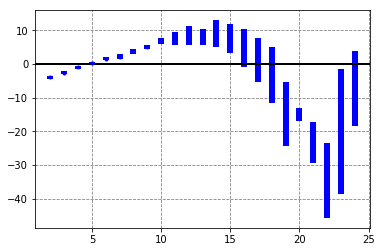

In [24]:
ibase = "/Users/miiya/Dropbox/programs/data/correlator.PS.dir/c"
Nbin  = 3
tmin  = 2
tmax  = 25

Corr_PS_1 = plot_Zfactor.read_correlators("%s/correlator.PS.dir/*/%s*" % (ibase, "proton_CG05_CG05"))
Corr_PS_2 = plot_Zfactor.read_correlators("%s/correlator.PS.dir/*/%s*" % (ibase,     "Xi_CG05_CG05"))
Corr_PS_3 = plot_Zfactor.read_correlators("%s/correlator.PS.dir/*/%s*" % (ibase, "Lambda_CG05_CG05"))

Corr_PS_1 = plot_Zfactor.make_jk_samples(Corr_PS_1[:,:,1], Nbin)
Corr_PS_2 = plot_Zfactor.make_jk_samples(Corr_PS_2[:,:,1], Nbin)
Corr_PS_3 = plot_Zfactor.make_jk_samples(Corr_PS_3[:,:,1], Nbin)

Corr_PS_3[Corr_PS_3==0.0] = 1e-10

Corr_PS = Corr_PS_1 * Corr_PS_2 / Corr_PS_3**2
Corr_PS = plot_Zfactor.calc_effmass_exp(Corr_PS) * 197.327 / 0.0907
Nbin    = len(Corr_PS[:,0])

tplt = np.arange(tmin,tmax)
plt.errorbar(tplt, np.mean(Corr_PS[:,tmin:tmax],axis=0), 
             yerr=np.std(Corr_PS[:,tmin:tmax],axis=0)*np.sqrt(Nbin-1), fmt="b.", lw=6)
plt.grid(which='major',color='gray',linestyle='--')
plt.axhline(0.0, lw=2, color='black')